<a href="https://colab.research.google.com/github/Anisha-Tasneem/CSE465/blob/main/Test_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

# Define the dataset paths
train_data_dir = "/content/drive/MyDrive/DataSet/Train"
test_data_dir = "/content/drive/MyDrive/DataSet/Test"
# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Create data generators for training and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,            # Rescale pixel values to [0, 1]
    shear_range=0.2,            # Randomly apply shearing
    zoom_range=0.2,             # Randomly zoom into images
    horizontal_flip=True)       # Randomly flip images horizontally

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=len(train_generator),
          epochs=50,
          validation_data=test_generator,
          validation_steps=len(test_generator))

# Access the training accuracy from the history object
training_accuracy = history.history['accuracy']

# Print or use the training accuracy as needed
print(f"Training Accuracy: {training_accuracy[-1]}")

# Save the model
model.save('cnn_model.h5')


Found 7020 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/50
220/220 [==============================] - 3844s 17s/step - loss: 0.5490 - accuracy: 0.7189 - val_loss: 0.2955 - val_accuracy: 0.8883
Epoch 2/50
220/220 [==============================] - 74s 335ms/step - loss: 0.4917 - accuracy: 0.7662 - val_loss: 0.4333 - val_accuracy: 0.8240
Epoch 3/50
220/220 [==============================] - 71s 321ms/step - loss: 0.4061 - accuracy: 0.7970 - val_loss: 0.3404 - val_accuracy: 0.8347
Epoch 4/50
220/220 [==============================] - 70s 319ms/step - loss: 0.3151 - accuracy: 0.8709 - val_loss: 0.3142 - val_accuracy: 0.8467
Epoch 5/50
220/220 [==============================] - 73s 332ms/step - loss: 0.3100 - accuracy: 0.8641 - val_loss: 0.2622 - val_accuracy: 0.8800
Epoch 6/50
220/220 [==============================] - 72s 329ms/step - loss: 0.2773 - accuracy: 0.8846 - val_loss: 0.3148 - val_accuracy: 0.8470
Epoch 7/50
220/220 [==========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


94/94 [==============================] - 9s 91ms/step - loss: 0.2473 - accuracy: 0.9283
Test Accuracy: 92.83%
94/94 [==============================] - 8s 85ms/step
              precision    recall  f1-score   support

 Parasitized       0.70      0.67      0.68      2100
  Uninfected       0.29      0.31      0.30       900

    accuracy                           0.56      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.57      0.56      0.57      3000



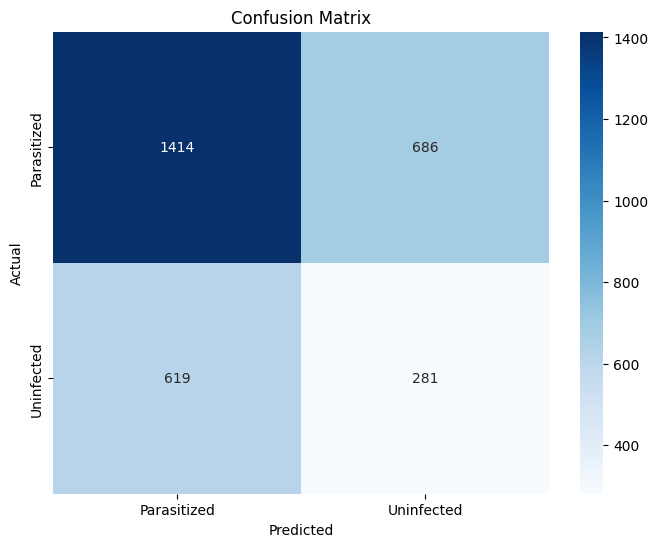

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the saved model
model = tf.keras.models.load_model('cnn_model.h5')

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Generate predictions for the test set
predictions = model.predict(test_generator)

# Convert predicted probabilities to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int)

# Get true labels from the test generator
true_labels = test_generator.classes

# Create a classification report
class_names = list(test_generator.class_indices.keys())
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_names)
print(classification_rep)

# Create a confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Display a confusion matrix plot with values inside
def plot_confusion_matrix_with_values(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix_with_values(confusion_mat, classes=class_names)



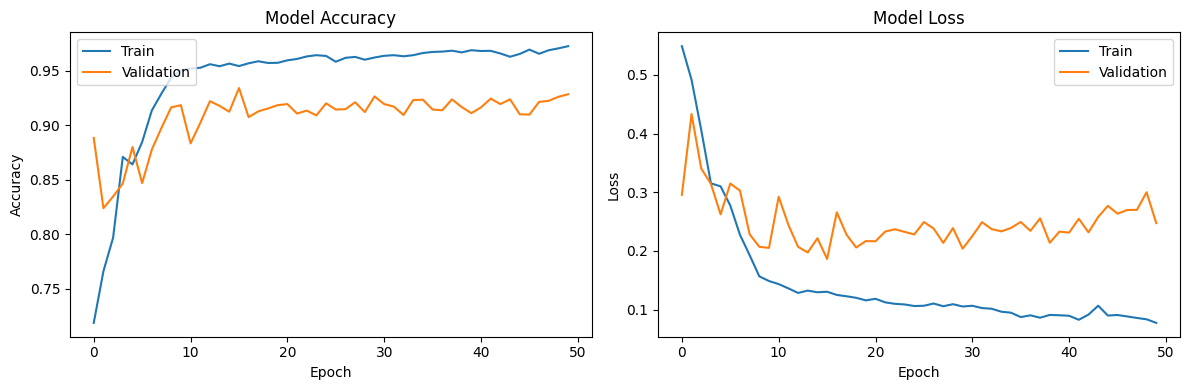

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation curves
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

plot_training_history(history)


In [ ]:
!nvidia-smi

Sun Nov 12 16:15:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    30W /  70W |   2877MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.152
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

In [ ]:
!cat /proc/meminfo

MemTotal:       13294208 kB
MemFree:         3002444 kB
MemAvailable:    8509728 kB
Buffers:          157860 kB
Cached:          5511984 kB
SwapCached:            0 kB
Active:          1068488 kB
Inactive:        8684448 kB
Active(anon):       1136 kB
Inactive(anon):  4097656 kB
Active(file):    1067352 kB
Inactive(file):  4586792 kB
Unevictable:          16 kB
Mlocked:              16 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               460 kB
Writeback:             0 kB
AnonPages:       4083200 kB
Mapped:          1391292 kB
Shmem:             15692 kB
KReclaimable:     178560 kB
Slab:             246388 kB
SReclaimable:     178560 kB
SUnreclaim:        67828 kB
KernelStack:       22128 kB
PageTables:        32572 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6647104 kB
Committed_AS:    4956352 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       94912 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   28G   51G  35% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G  8.0K  5.7G   1% /dev/shm
/dev/root       2.0G  1.1G  885M  55% /usr/sbin/docker-init
tmpfs           6.4G  124K  6.4G   1% /var/colab
/dev/sda1        50G   30G   21G  60% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            79G   30G   49G  39% /content/drive


In [ ]:
import psutil

# Get CPU usage
cpu_usage = psutil.cpu_percent()
print(f'CPU Usage: {cpu_usage}%')

# Get memory usage
memory_info = psutil.virtual_memory()
print(f'Total Memory: {memory_info.total} bytes')
print(f'Used Memory: {memory_info.used} bytes')
print(f'Free Memory: {memory_info.available} bytes')

# Get GPU information (if available)
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

CPU Usage: 44.1%
Total Memory: 13613268992 bytes
Used Memory: 4602802176 bytes
Free Memory: 8661147648 bytes


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16062474715712250188
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14410383360
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4977859490510497018
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
# Assuming 'model' is your CNN model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   